<a href="https://colab.research.google.com/github/chien-sheng-liu/disrupted-timeseries-forecasting/blob/main/Inventec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv('drive/My Drive/Inventec/Inventec.csv', sep = ';')
df.columns = ['name', 'party', 'state',
                'armforce_in_middleeast', 'refugees_accpetance', 'china_5G_infra', 'trade_war',  'antitrust_laws', ##International Relations
                'degree_level', 'assets_amount', 'having_loans', 'immigrant', 'support_or_not', ## Do they support FED increase interest rates?
                'support_abortion', 'support_free_childcare', 'support_free_education', 'support_2yrs_maternity_leave', 'support_6yrs_parental_leave', ## interior
               ]
df.head()

,name,party,state,armforce_in_middleeast,refugees_accpetance,china_5G_infra,trade_war,antitrust_laws,degree_level,assets_amount,having_loans,immigrant,support_or_not,support_abortion,support_free_childcare,support_free_education,support_2yrs_maternity_leave,support_6yrs_parental_leave
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0




```
As values of column "state" indicate abbreviations of U.S's states, hence I rename column 1 to 15 as 15 unique events(policies) related to U.S government.

I divided exercise into three parts. The first one is to do clustering to see who are in the same group toward the international relations topics. The method I used is K-means.

The second section is to apply classification model to understand the stance of raising interest rate of each councilor. The model I applied here is decision tree.

The last part is the association analysis. Every column is about interior affairs. Here, I created 5 policies, and I would like to see the attitudes of each policy of each councilor, and further understand if someone will support policy B while he/she supports policy A.


```



#Clustering

In [206]:
df_clustering = df.iloc[:, :8]
df_clustering.head()

,name,party,state,armforce_in_middleeast,refugees_accpetance,china_5G_infra,trade_war,antitrust_laws
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0




```
In this exercise, I names 5 columns about international relations.

1.0 means support, 0.5 indicates netural, 0.0. means rejection

armforce_in_middleeast: Should US armforce station in middle east area or not?
refugees_acceptance: Should US authority accept refugees or not?
china_5G_infra: Should US authority accept 5G infrastructure from China or not?
trade_war: The stance toward U.S.-China trade war
antitrust_law: The stance toward anti trust commercial laws.
```



##Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

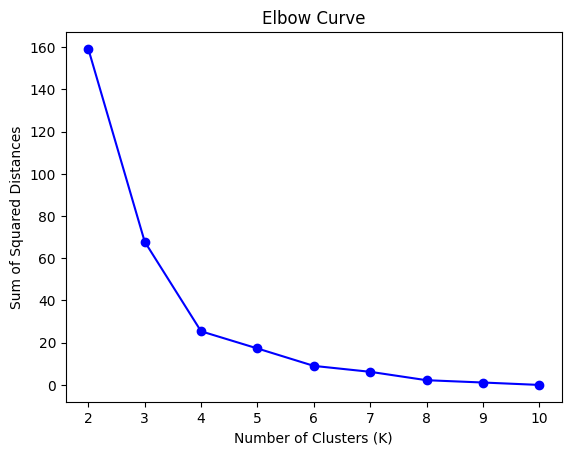

Best K (from elbow curve): 10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


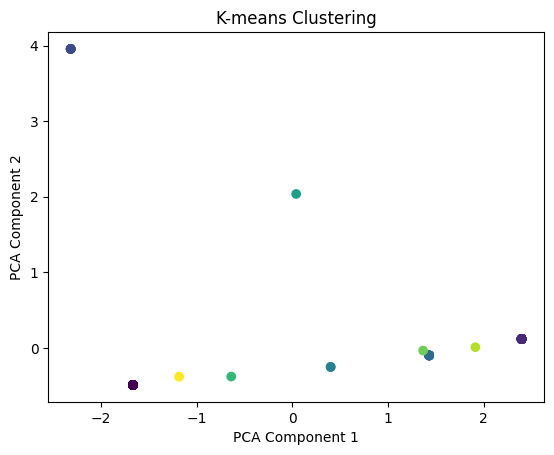

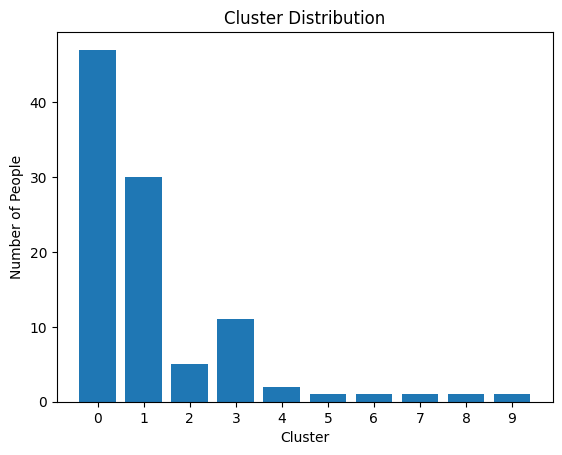

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = df_clustering

columns_for_clustering = ['armforce_in_middleeast', 'refugees_accpetance', 'china_5G_infra', 'trade_war', 'antitrust_laws']
X = data[columns_for_clustering]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

silhouette_scores = []
elbow_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(scaled_data, labels))
    elbow_scores.append(kmeans.inertia_)

plt.plot(k_values, elbow_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()

# Determine the best K using the elbow curve
best_k = elbow_scores.index(min(elbow_scores)) + 2
print("Best K (from elbow curve):", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

## Apply PCA
if len(columns_for_clustering) > 2:
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)
else:
    pca_data = scaled_data

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.show()

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

cluster_counts = data_with_clusters['Cluster'].value_counts().sort_index()

plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of People')
plt.title('Cluster Distribution')
plt.xticks(cluster_counts.index)
plt.show()

In [208]:
data_with_clusters.head()

##You can see who is in which cluster.

,name,party,state,armforce_in_middleeast,refugees_accpetance,china_5G_infra,trade_war,antitrust_laws,Cluster
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,3


#Classification

In [209]:
df_classification1 = df.iloc[:, :3]
df_classification2 = df.iloc[:, 8:13]
df_classification = df_classification1.join(df_classification2)

df_classification['support_or_not'] = df_classification['support_or_not'].replace({0: "No", 0.5: "Natural", 1: "Yes"})
df_classification.head(5)

,name,party,state,degree_level,assets_amount,having_loans,immigrant,support_or_not
0,Alexander,R,TN,0.0,0.0,1.0,1.0,Yes
1,Ayotte,R,NH,0.0,0.0,1.0,0.0,Yes
2,Baldwin,D,WI,1.0,0.0,1.0,0.0,No
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,Yes
4,Bennet,D,CO,1.0,0.0,1.0,0.0,No




```
Illustration:

I built a classification model to see if the person support the increase of the interest rate or not. Hence, the features which I named are all related to personal background, as these factors would directly influence to their benefits.

Degree level: 0.0 means bachelor's, 0.5 means master's, 1.0 means Ph.D
Assest Amount: 0.0 means below $10W, 0.5 means $10W-50W, 1.0 means above $50W
Having Loans: 0.0 means No loan, 0.5 means $1 - $20W loans, 1.0 means above $20W loans
Immigrant: 0.0 means native, 0.5 means 2 or above generation, 1.0 means new immigrant
Suuport or not: 0.0.means negation, 0.5 means netural, 1,0 means advocatcy
```



##Model

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

data = df_classification.iloc[:, 1:]

# Split features and target variable
X = data.drop('support_or_not', axis=1)
y = data['support_or_not']

# Encode categorical variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.95
Precision: 1.0
Recall: 0.95
F1 Score: 0.9741379310344829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Prediction



```
Here, I created a new unseen entry to see the stance toward the support of FED increase interest rate.

The personal is like:
Name: Morris
Party: R
State: SC
Degreee Level: 1.0
Assest Amount: 1.0
Haveing Loans: 0.0
Immigrant: 0.5
```



In [218]:
unseen_data = pd.DataFrame({'party': ['R'],
                            'state': ['SC'],
                            'degree_level': [1.0],
                            'assets_amount': [1.0],
                            'having_loans': [0.0],
                            'immigrant': [0.5]})

unseen_data_encoded = pd.get_dummies(unseen_data)

unseen_data_encoded = unseen_data_encoded.reindex(columns=X.columns, fill_value=0)

prediction = model.predict(unseen_data_encoded)

print("Morris's stance toward the increase of interest rate is", prediction[0])

Morris's stance toward the increase of interest rate is Natural


#Association Analysis

In [219]:
df_association1 = df.iloc[:, :3]
df_association2 = df.iloc[:, 13:]
df_association = df_association1.join(df_association2)

df_association.head(5)

,name,party,state,support_abortion,support_free_childcare,support_free_education,support_2yrs_maternity_leave,support_6yrs_parental_leave
0,Alexander,R,TN,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,1.0,0.0,1.0,0.0


##Model



```
I developed an association rule model to see the association between each bill toward the topic of interior policies in the parliament.

I'd like to see if the councilor supports policy A, will he/she likely support another policies as well? Using association rules can lead us to understand the stance with mixture of policies.

Note: 0.5 means netural attitude, it, therefore, can't produce any purport. So, I drop all 0.5 in this exercise.
```



In [220]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

data = df_association

data = data.drop(['name', 'party', 'state'], axis=1)

# Drop natural opinion as it doesn't means any stance
data = data[data != 0.5].dropna()

data_encoded = pd.get_dummies(data)

frequent_itemsets = apriori(data_encoded, min_support=0.2, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Association Rules:")
rules.sort_values(['confidence'], ascending = True).head()

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,(support_free_childcare),"(support_6yrs_parental_leave, support_2yrs_mat...",0.479592,0.346939,0.346939,0.723404,2.085106,0.180550,2.361068
33,(support_free_childcare),"(support_6yrs_parental_leave, support_2yrs_mat...",0.479592,0.357143,0.357143,0.744681,2.085106,0.185860,2.517857
21,(support_free_childcare),"(support_6yrs_parental_leave, support_abortion)",0.479592,0.357143,0.357143,0.744681,2.085106,0.185860,2.517857
47,(support_2yrs_maternity_leave),"(support_free_childcare, support_6yrs_parental...",0.459184,0.357143,0.346939,0.755556,2.115556,0.182945,2.629870
28,(support_2yrs_maternity_leave),"(support_6yrs_parental_leave, support_abortion)",0.459184,0.357143,0.346939,0.755556,2.115556,0.182945,2.629870
